In [1]:
import pandas as pd
import numpy as np

In [2]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import cufflinks as cf
cf.go_offline(connected=True)

In [4]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")


In [6]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [7]:
import warnings

warnings.filterwarnings(action="ignore")

In [8]:
df = pd.read_csv("kbo_20season_batter_data.csv")

In [9]:
df

,순,이름,팀,포지션,WAR,출장,타석,타수,득점,안타,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,1,로하스,KT,RF,7.80,142,628,550,116,192,...,0,8,.349,.417,.680,1.097,.467,180.8,7.80,7.29
1,2,김하성,키움,SS,6.87,138,622,533,111,163,...,3,3,.306,.397,.523,.921,.407,147.4,6.87,4.22
2,3,양의지,NC,C,5.95,130,528,461,86,151,...,1,6,.328,.400,.603,1.003,.432,153.3,5.95,3.68
3,4,터커,KIA,RF,5.70,142,631,542,100,166,...,0,4,.306,.398,.557,.955,.420,148.9,5.70,2.40
4,5,최형우,KIA,DH,5.70,140,600,522,93,185,...,0,3,.354,.433,.590,1.023,.450,168.4,5.70,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,369,이성열,한화,DH,-0.93,79,248,227,23,46,...,0,0,.203,.270,.330,.601,.277,57.5,-0.93,-1.13
274,370,김규성,KIA,2B,-1.01,103,182,157,21,28,...,11,0,.178,.246,.261,.507,.226,21.0,-1.01,-1.85
275,371,김태진,NC,3B,-1.03,82,280,263,28,62,...,2,1,.236,.273,.274,.547,.258,41.9,-1.03,-0.57
276,372,박찬호,KIA,SS,-1.15,141,530,479,63,106,...,12,3,.221,.274,.273,.548,.254,39.9,-1.15,-1.96


In [10]:
df.columns

Index(['순', '이름', '팀', '포지션', 'WAR', '출장', '타석', '타수', '득점', '안타', '2루타',
       '3루타', '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA'],
      dtype='object')

## 2020시즌 타율, 타점, 홈런 top10은?

| 기호 | 포지션 | 영문표기 |
|:---:|:-------:|:----:|
| 1 | 투수 | P |
| 2 | 포수 | C |
| 3 | 1루수 | 1B |
| 4 | 2루수 | 2B |
| 5 | 3루수 | 3B |
| 6 | 유격수 | SS |
| 7 | 좌익수 | LF |
| 8 | 중견수 | CF |
| 9 | 우익수 | RF |
| D | 지명타자 | DH |

|기록|영문 기록(약자)|설명|
|:--|:----:|:----|
|타석|PA|선수가 타석에 들어선 수|
|타수|AB|타석에서 볼넷, 사구, 희생타를 제외한 값
|득점|R|득점수|
|안타|H|안타수|
2루타|2B|2루타수|
3루타|3B|3루타수|
홈런|HR|홈런수|
루타|TB|안타로 출루한 베이스 개수|
타점|RBI|타점수|
타율|AVG|타수당 안타를 친 비율.안타/타수|
출루율|OBP |출루에 성공한 비율.(안타+볼넷+사구)/(타수+볼넷+사구+희생플라이)|
장타율|SLG |타수당 출루한 베이스 개수.루타/타수|
OPS|OPS	|출루율과 장타율을 더한 수치. 출루율+장타율|
WAR|WAR|대체선수 대비 승리 기여도. 승리기여+대체|

In [11]:
df_stat = df[[ '이름', '팀', '포지션', 'WAR', '출장', '타석', '타수', '득점', '안타', '2루타',
       '3루타', '홈런', '루타', '타점', '타율', '출루', '장타', 'OPS']]

In [12]:
df_stat

,이름,팀,포지션,WAR,출장,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점,타율,출루,장타,OPS
0,로하스,KT,RF,7.80,142,628,550,116,192,39,1,47,374,135,.349,.417,.680,1.097
1,김하성,키움,SS,6.87,138,622,533,111,163,24,1,30,279,109,.306,.397,.523,.921
2,양의지,NC,C,5.95,130,528,461,86,151,26,1,33,278,124,.328,.400,.603,1.003
3,터커,KIA,RF,5.70,142,631,542,100,166,40,0,32,302,113,.306,.398,.557,.955
4,최형우,KIA,DH,5.70,140,600,522,93,185,37,1,28,308,115,.354,.433,.590,1.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,이성열,한화,DH,-0.93,79,248,227,23,46,5,0,8,75,34,.203,.270,.330,.601
274,김규성,KIA,2B,-1.01,103,182,157,21,28,2,1,3,41,11,.178,.246,.261,.507
275,김태진,NC,3B,-1.03,82,280,263,28,62,5,1,1,72,23,.236,.273,.274,.547
276,박찬호,KIA,SS,-1.15,141,530,479,63,106,16,0,3,131,36,.221,.274,.273,.548


In [13]:
df_stat.describe()

,WAR,출장,타석,타수,득점,안타,2루타,3루타,홈런,루타,타점
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,0.772734,66.906475,203.528777,178.438849,26.687050,48.676259,8.348921,0.658273,4.902878,73.050360,25.294964
std,1.610199,46.591456,199.706800,174.193474,29.447241,52.898543,10.382774,1.376093,7.987892,84.215413,30.968705
min,-1.180000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.137500,24.000000,31.250000,27.250000,4.000000,5.250000,1.000000,0.000000,0.000000,8.000000,2.000000
50%,0.050000,63.500000,122.500000,107.500000,15.000000,25.000000,4.000000,0.000000,1.000000,35.500000,11.500000
75%,0.960000,111.750000,359.750000,309.000000,40.500000,80.750000,13.750000,1.000000,5.000000,119.500000,36.000000
max,7.800000,144.000000,668.000000,586.000000,116.000000,199.000000,49.000000,8.000000,47.000000,374.000000,135.000000


In [14]:
import missingno as msno

<AxesSubplot:>

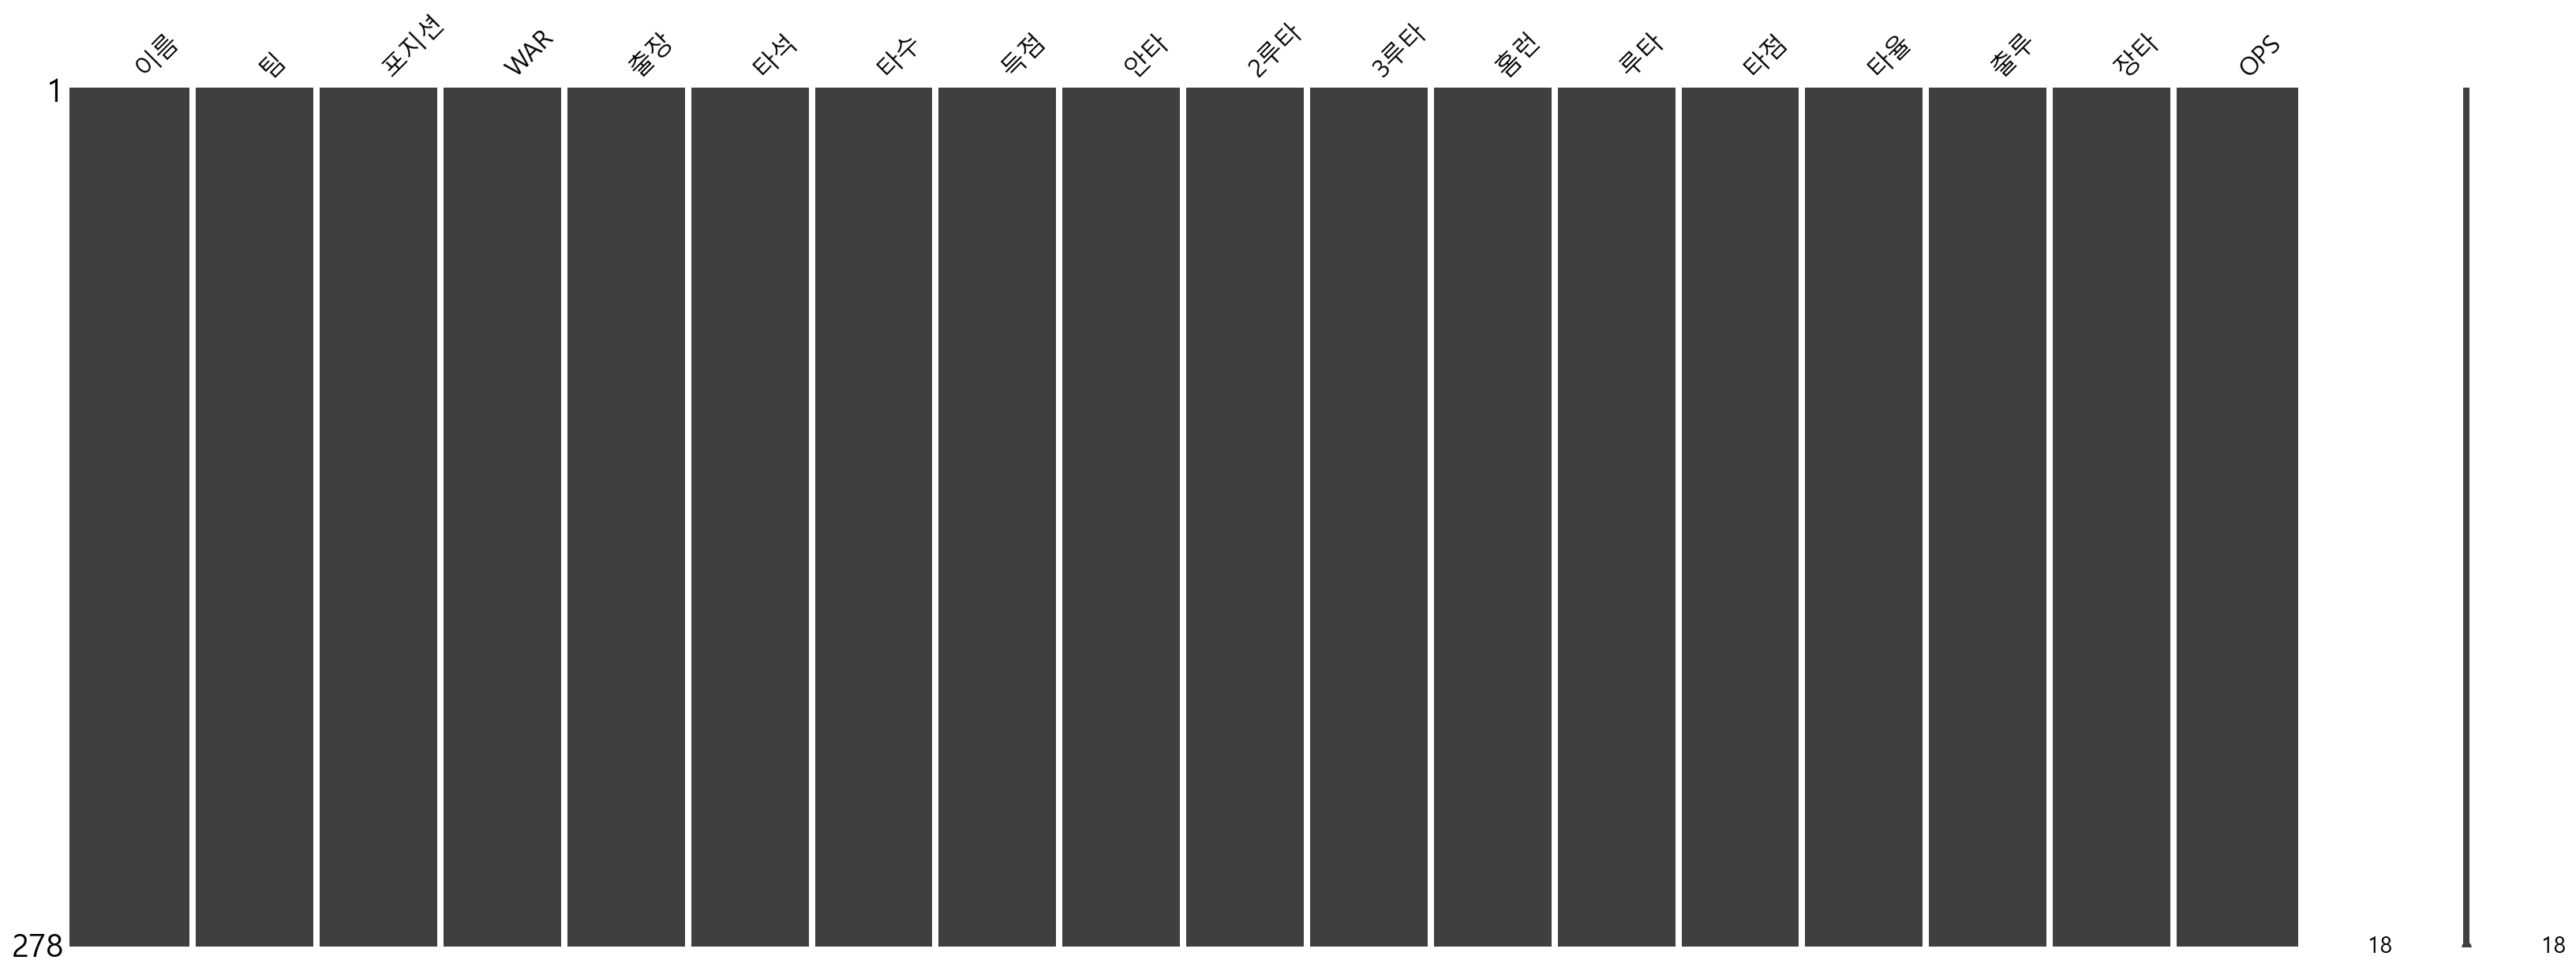

In [15]:
msno.matrix(df_stat)